In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Setting up YOLOv9 Model

In [3]:
from ultralytics import YOLO

model=YOLO("yolov9s.pt")

# Initial Model Prediction


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/gloves_in_the_ocean10_jpg.rf.d25996aa0bc37d0943879e0b48353b70.jpg: 640x640 1 bird, 20.4ms
Speed: 10.2ms preprocess, 20.4ms inference, 277.2ms postprocess per image at shape (1, 3, 640, 640)


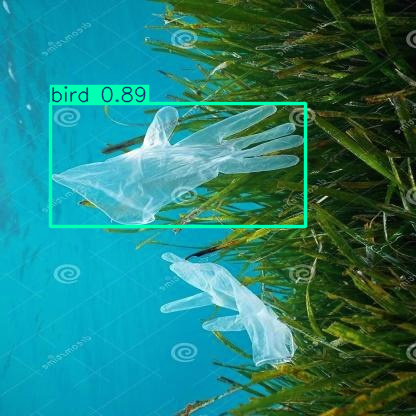

In [4]:
img='/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/gloves_in_the_ocean10_jpg.rf.d25996aa0bc37d0943879e0b48353b70.jpg'
result=model.predict(source=img,imgsz=(640))
plot = result[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Fine-tuning YOLOv9 Model

In [6]:
!yolo detect train \
    model=yolov9s.pt \
    data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml \
    epochs=100 imgsz=768 batch=32 \
    optimizer=AdamW lr0=0.001 lrf=0.01 \
    patience=30 \
    augment=True cache=True

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=

# Performance Metrics

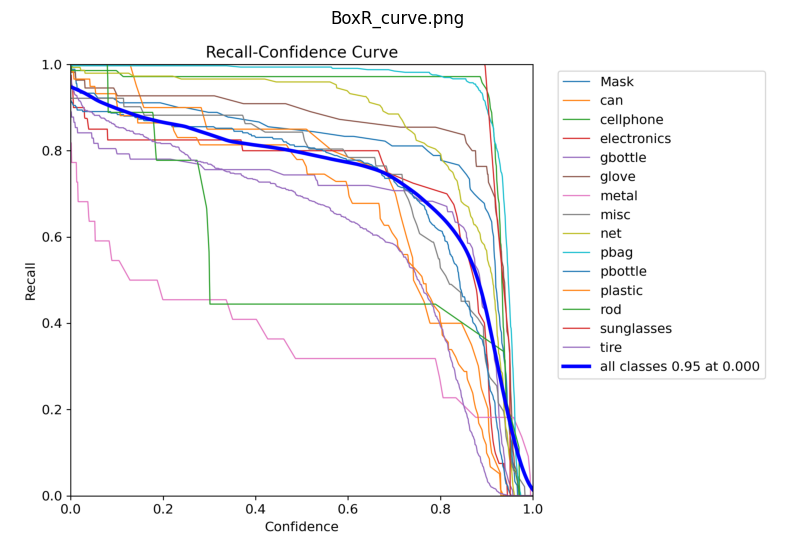

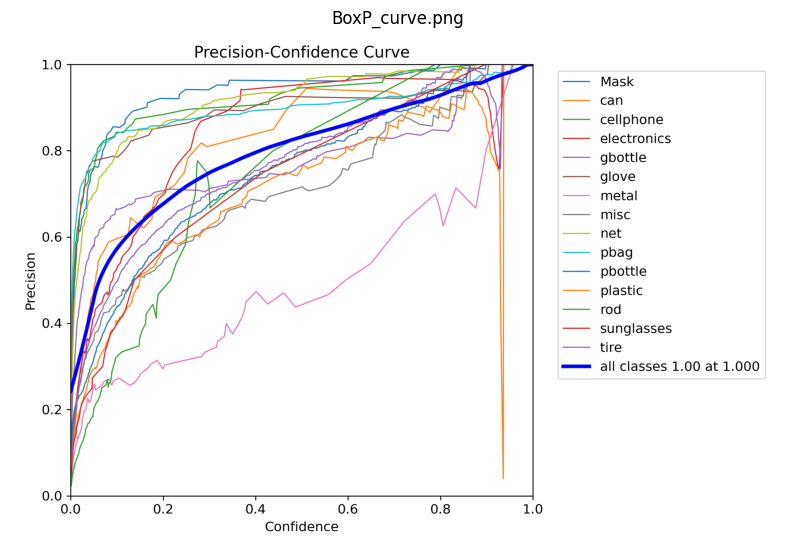

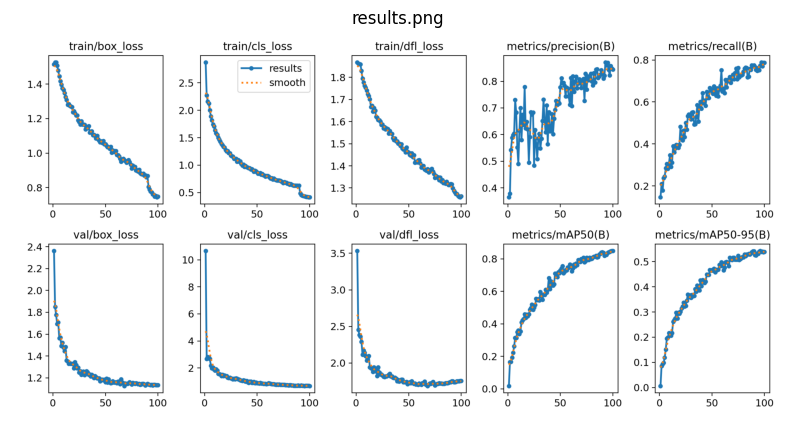

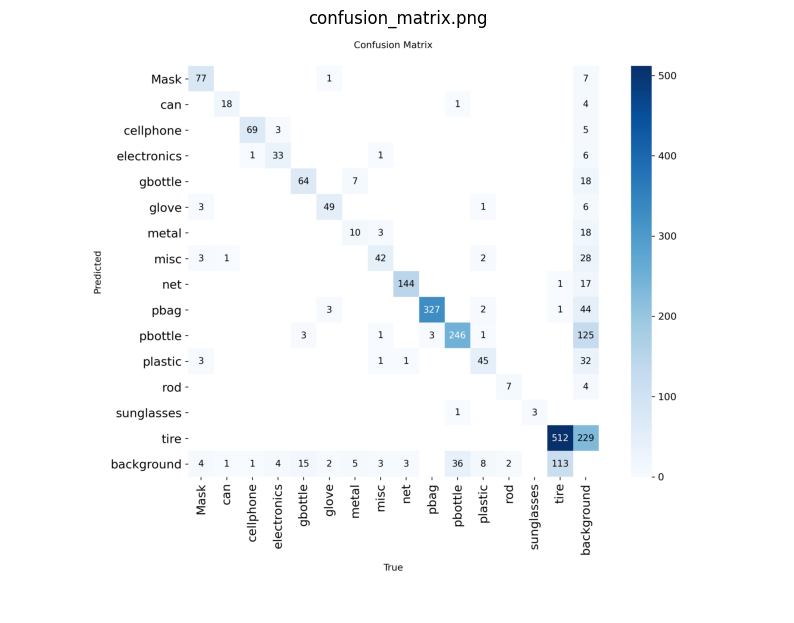

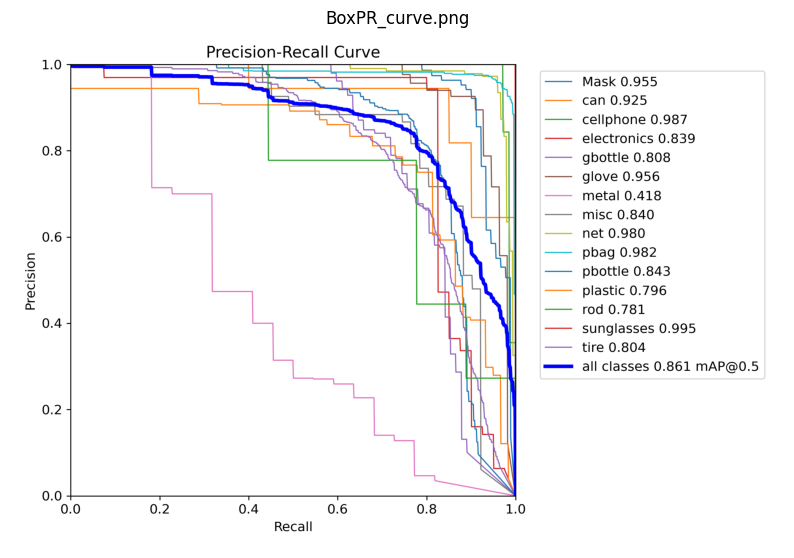

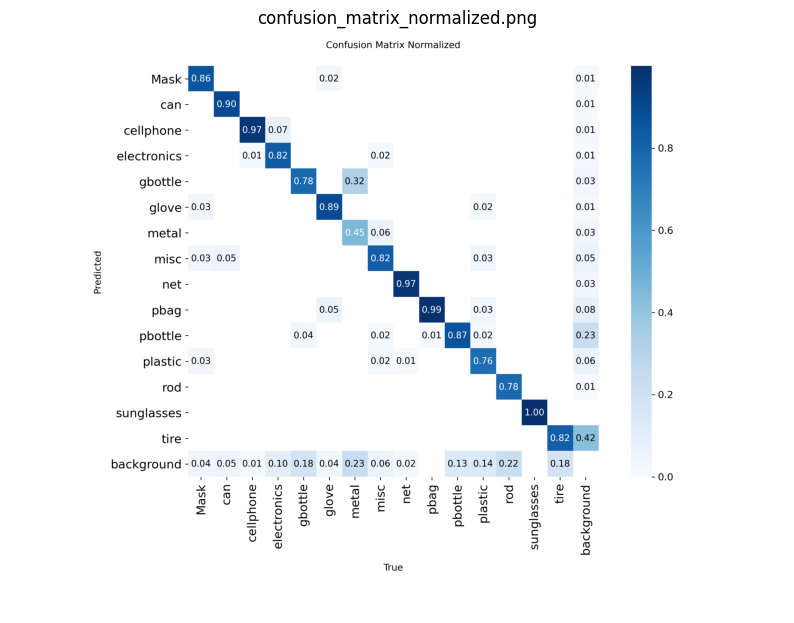

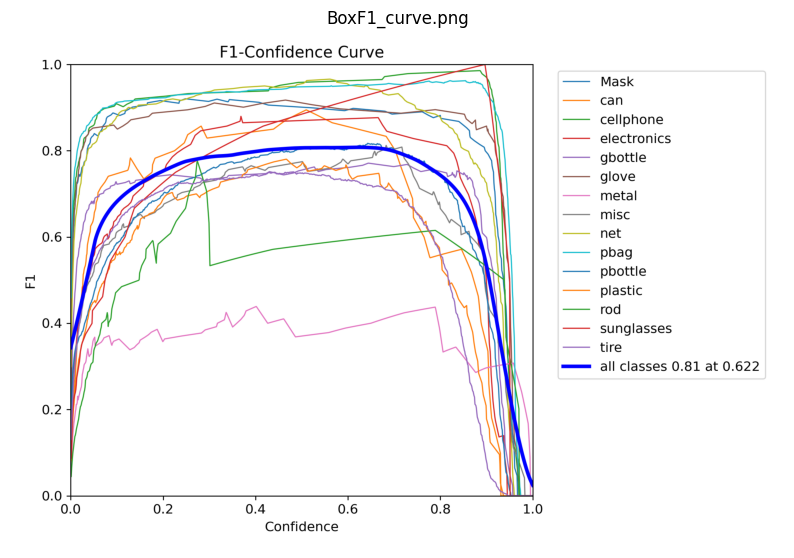

In [7]:
train_dir = "/kaggle/working/runs/detect/train" 
files = [f for f in os.listdir(train_dir) if f.endswith(".png")]

for f in files:
    path = os.path.join(train_dir, f)
    img = cv2.imread(path)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f)
    plt.show()

In [8]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,132.596,1.51430,2.87606,1.86828,0.36470,0.14654,0.01854,0.00660,2.36151,10.66270,3.53246,0.067290,0.000330,0.000330
1,2,263.640,1.52673,2.27310,1.86160,0.37766,0.21061,0.16580,0.08595,1.85110,2.66636,2.45470,0.034283,0.000657,0.000657
2,3,393.157,1.52672,2.16232,1.86041,0.54211,0.17850,0.16631,0.09293,1.77557,2.82553,2.38391,0.001270,0.000977,0.000977
3,4,522.351,1.50695,2.12333,1.85934,0.58766,0.23808,0.19208,0.09865,1.69230,2.75840,2.36278,0.000970,0.000970,0.000970
4,5,651.778,1.47882,1.99837,1.82935,0.59837,0.24527,0.22210,0.11870,1.70849,2.66725,2.28897,0.000960,0.000960,0.000960


In [9]:
bestmodel=YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
metrics = bestmodel.val(split = 'test')

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,172,893 parameters, 0 gradients, 26.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.9±3.0 MB/s, size: 48.2 KB)
val: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/labels... 501 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 501/501 236.4it/s 2.1s
WARNING ⚠️ val: Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 3.0it/s 10.7s
                   all        501        966      0.802      0.732      0.779      0.507
                  Mask         33         37       0.87      0.722      0.859      0.687
                   can         13         19      0.917      0.579      0.794      0.443
             cellphone         40

In [12]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.8021656943629173
metrics/recall(B):  0.7316011934350217
metrics/mAP50(B):  0.7786874054161178
metrics/mAP50-95(B):  0.5069909903203825


# Testing the Fine-tuned Model


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-316__flipv_jpg.rf.1202d2a608b881f4094b01f8b692302b.jpg: 640x640 1 cellphone, 20.9ms
Speed: 2.8ms preprocess, 20.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


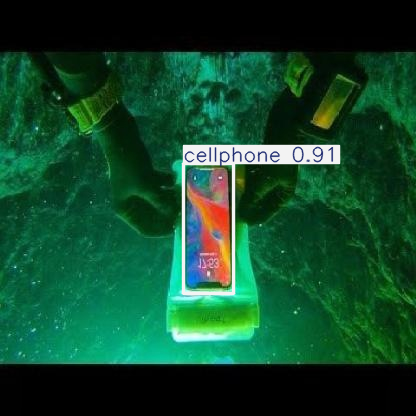


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-491__fliph_jpg.rf.2bc296741b933394fcd8351161caae57.jpg: 640x640 1 pbag, 20.2ms
Speed: 3.0ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


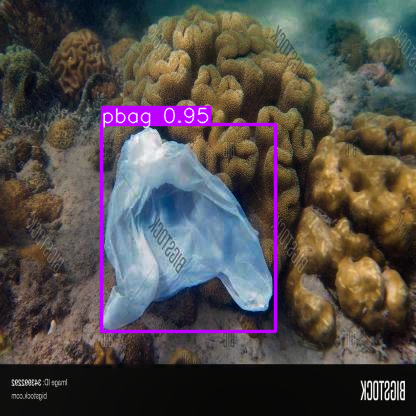


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-108__fliph_jpg.rf.ad208bb7976cebbe73ae2ec95a656a04.jpg: 640x640 1 net, 20.2ms
Speed: 3.0ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


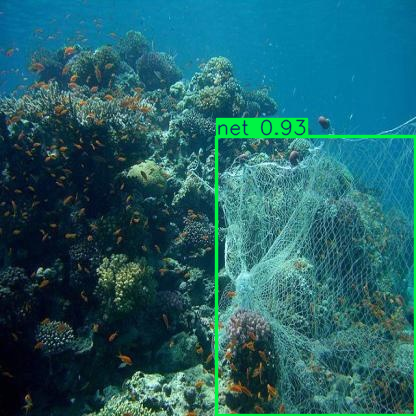


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-104_jpg.rf.536bc6cdbba9116025a16b24adfe7e9a.jpg: 640x640 1 net, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


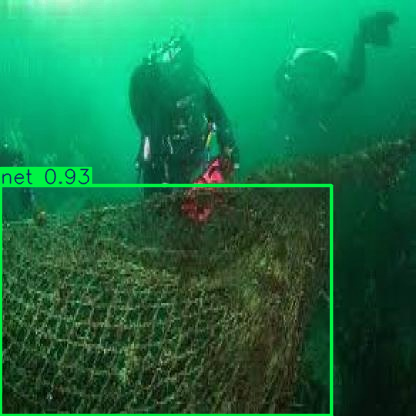


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-1110__flipv_jpg.rf.1b5472037858f28fdc3f9eaee7667850.jpg: 640x640 1 pbottle, 20.2ms
Speed: 2.9ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


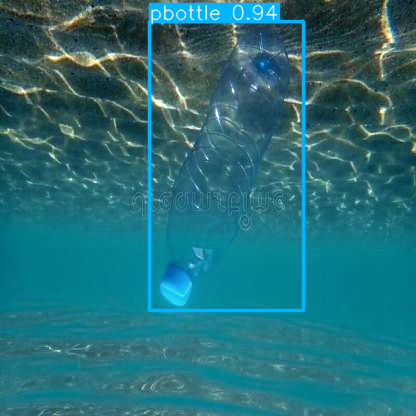

In [15]:
images = os.listdir("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images")
for i in range(5):
    image = os.path.join("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images", images[i+18])
    result_predict = bestmodel.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))